In [21]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Создание датафрема

__Для генерации данных в random необходимо установить:__
- seed = "АДВИ_2023"
- длина каждого списка N = 1000

In [22]:
sns.set()
random.seed("АДВИ_2023")

__Index колонка:__ 
- создать список из N последовательных целых элементов от 1 до 1000 включительно
- с помощью специальной функции random перемешать его

In [23]:
index = list(range(1,1001))
random.shuffle(index)

__Groups колонка:__
- создать список из N элементов, состоящий из значений из списка ["группа_1", "группа_2", "группа_3", "группа_4", "группа_5"]
- необходимо использовать функцию из random которая возвращает список элементов длины k, выбранных из последовательности population с перестановкой элементов

In [24]:
groups = random.choices(["группа_1", "группа_2", "группа_3", "группа_4", "группа_5"], k=1000)

- __uniform колонка:__ создать список из N элементов, состоящий из целых значение из равномерного распределения [50, 100]
- __gauss_1, gauss_2, gauss_3 колонки:__ Создать 3 списка из N элементов каждый, заполненные значениями из нормальных распределений с параметрами (0,1), (0,144), (50,81)

In [25]:
uniform = [random.randint(50, 100) for _ in range(1000)]
gauss_1 = [random.gauss(mu=0, sigma=1) for _ in range(1000)]
gauss_2 = [random.gauss(mu=0, sigma=12) for _ in range(1000)]
gauss_3 = [random.gauss(mu=50, sigma=9) for _ in range(1000)]

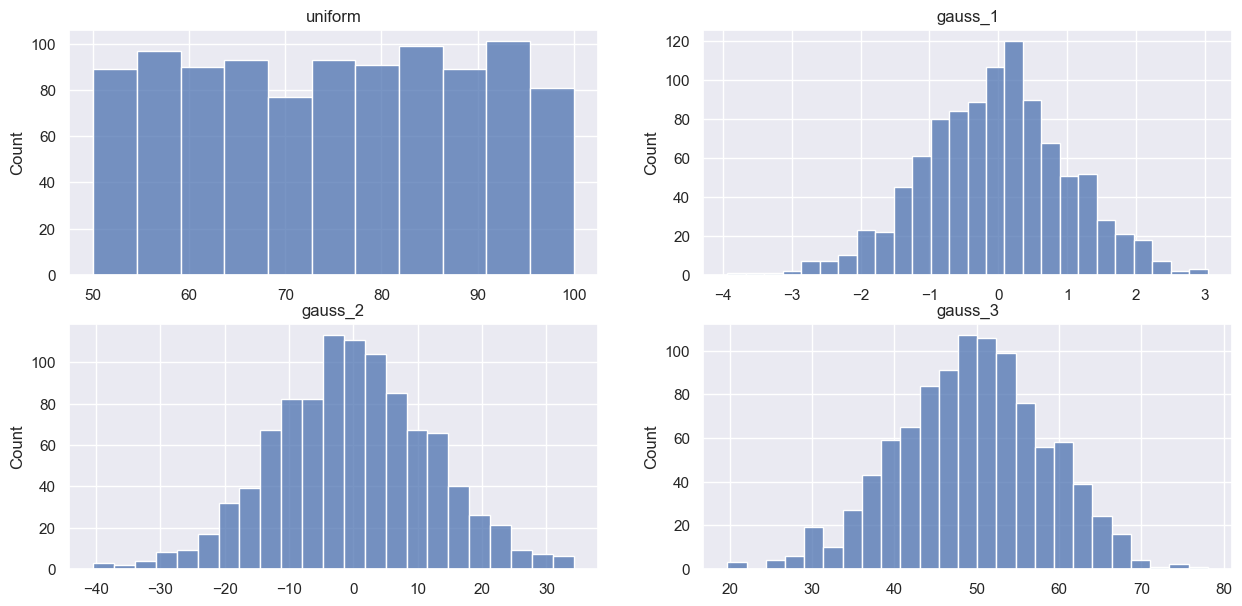

In [26]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,7))
sns.histplot(uniform, ax=axs[0][0]).set(title='uniform')
sns.histplot(gauss_1, ax=axs[0][1]).set(title='gauss_1')
sns.histplot(gauss_2, ax=axs[1][0]).set(title='gauss_2')
sns.histplot(gauss_3, ax=axs[1][1]).set(title='gauss_3')
plt.show()

__Создать pandas DataFrame__:
- где (1) будет индексом
- (2)-(4) колонки, названия колонок ["groups", "uniform", "gauss_1", "gauss_2", "gauss_3"] соответственно, не забывая проверить, что типы колонок должны соответствовать заявленным типам данных

In [27]:
df = pd.DataFrame(
    np.array([index, groups, uniform, gauss_1, gauss_2, gauss_3]).T, 
    columns=["index", "groups", "uniform", "gauss_1", "gauss_2", "gauss_3"]
).set_index('index')


df.index = df.index.astype(int)
df.uniform = df.uniform.astype(int)
df[['gauss_1', 'gauss_2', 'gauss_3']] = df[['gauss_1', 'gauss_2', 'gauss_3']].astype(float)

__Для колонок gauss_1 и gauss_2 заменить значения на None:__
- для gauss_1, если индекс у значение делится на 121 без остатка
- для gauss_2, если дробная часть больше 0.95

In [28]:
df.loc[df.index % 121 == 0, 'gauss_1'] = None
df.loc[df.gauss_2 % 1 > 0.95, 'gauss_2'] = None

__Теперь, для пропущенных значений gauss_1 и gauss_2:__
- для gauss_2 None заменить на среднее по колонке
- удалить строчки из таблицы, где gauss_1 == None

In [29]:
df.loc[df.gauss_2.isna(), 'gauss_2'] = df.gauss_2.mean()

In [30]:
df = df.dropna(subset=['gauss_1']).copy()

In [31]:
df

,groups,uniform,gauss_1,gauss_2,gauss_3
index,,,,,
476,группа_1,95,3.010291,2.156346,57.455851
315,группа_5,77,0.190277,-9.934550,62.694177
490,группа_4,96,-0.282161,9.211071,54.688895
748,группа_3,56,1.127080,-12.391793,30.192353
471,группа_5,52,-1.238270,10.938748,52.682052
...,...,...,...,...,...
260,группа_4,57,-1.484164,-5.911598,49.330196
146,группа_4,78,-0.379041,-3.132954,60.329900
972,группа_1,52,-0.857206,0.835715,51.926114


# Задачи

__Сколько всего получилось записей в таблице после выполнения всех пунктов из условия?__

In [32]:
len(df)

992

__Для колонки gauss_2 посчитать среднее и среднеквадратическое отклонение__ \
Результаты необходимо написать в одну ячейку, разделенные пробелом, сначала среднее потом среднеквадратическое отклонение. Результаты округлить до сотых. Для дробной части использовать точку, как разделитель.

In [33]:
round(df.gauss_2.mean(), 2), round(df.gauss_2.std(), 2)

(-0.26, 11.93)

__Какая группа встречается чаще всего и сколько раз?__ \
Сначала вывести название группы, через пробел указать целое число.

In [34]:
df.groups.value_counts()

группа_4    222
группа_1    215
группа_2    194
группа_3    184
группа_5    177
Name: groups, dtype: int64

__Для группа_5 вывести самый "ранний" (наименьший) индекс__

In [35]:
df[df.groups == 'группа_5'].index.min()

6

__Сколько записей из колонки uniform имеют значение не ниже значения 90% перцентиля?__

In [36]:
sum(df.uniform >= np.percentile(uniform, 90))

118

__У какой группы наибольшее значение медианы для gauss_3?__ \
Вывести это значение вместе с группой. Сначала группа, через пробел значение медианы (результат округлить до сотых , для дробной части использовать точку, как разделитель)

In [37]:
df.groupby('groups').gauss_3.median().sort_values(ascending=False).apply(lambda x: round(x, 2))

groups
группа_2    49.99
группа_5    49.94
группа_1    49.88
группа_3    49.46
группа_4    49.07
Name: gauss_3, dtype: float64

__У какой группы наибольшее минимальное значение uniform?__ \
Если такого нет, выбрать группу наибольшим минимальным значением в gauss_1. \
Ответ дать в виде группы, через пробел указать значение в gauss_2 с аналогичной агрегацией (результат округлить до сотых, для дробной части использовать точку, как разделитель)

In [38]:
df.groupby('groups').agg({
    'uniform': min,
    'gauss_1': min,
    'gauss_2': min
}).sort_values(['uniform', 'gauss_1'], ascending=[False, False]).apply(lambda x: round(x, 2))

,uniform,gauss_1,gauss_2
groups,,,
группа_3,50,-2.61,-36.19
группа_5,50,-2.64,-40.39
группа_2,50,-2.69,-38.37
группа_1,50,-3.63,-22.11
группа_4,50,-3.93,-29.90


__Создать новую колонку gauss где значения будут получаться из (gauss_1 + gauss_2) / gauss_3__ \
Чему будет равен 70% перцентиль (результат округлить до сотых, для дробной части использовать точку, как разделитель)?

In [39]:
df['gauss_new'] = (df.gauss_1 + df.gauss_2) / df.gauss_3

In [40]:
round(np.percentile(df.gauss_new, 70), 2)

0.11